In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
%matplotlib inline

In [128]:
from rioniso.model import *
from rioniso.importdata import ImportData

In [18]:
exp_data_file = '/home/duskdawn/Downloads/72Ge-10-11s-2to21-2nd.npz'
simulated_data_file = '/home/duskdawn/analysis/72Ge/segundo-set-2023/72ge-2nd-off-isocurveinfo.ods'

In [31]:
imported_data = ImportData(simulated_data_file, exp_data_file, 10)

In [37]:
imported_data.simulated_data

array(['242787896.0', '243034987.0', '243051471.0', '243289249.0',
       '243363087.0', '243459012.0', '243592265.0', '243760902.0',
       '243762443.0', '243769910.0', '242043464.0', '242185266.0',
       '242283066.0', '242285300.0', '242355225.0', '242500462.0',
       '242595198.0', '242655062.0', '242658251.0', '243097181.0',
       '243105253.5', '243109532.5', '243111488.76', '243519180.0',
       '243521655.0', '243584870.0', '243587634.0', '243661866.0',
       '243758076.0', '243892726.0', '243920211.0', '244030523.0',
       '244032491.0', '244183201.0', '244367416.0', '244451027.0',
       '244634011.0', '242712480.0', '242899251.0', '242979828.0',
       '243159130.0', '243265561.0', '243335898.0', '243485373.0',
       '243562476.0', '243916763.0', '243935785.0', '243948979.0',
       '243949584.0', '244301175.0', '244379484.0', '244462245.0',
       '242818854.0', '242999817.0', '243181008.0', '243185522.0',
       '245238819.0', '243435438.0', '245489985.0', '24382132

In [338]:
iso_data = calculate_iso_inputs(imported_data.simulated_data, 
                                imported_data.experimental_data, xspan=6e3)

In [339]:
auxX = np.delete([float(freq) for freq in iso_data[:, 1]], [20])
auxY = np.delete([float(sigma) for sigma in iso_data[:, 3]], [20])
auxYe = np.delete([float(sigmae) for sigmae in iso_data[:, 4]], [20])

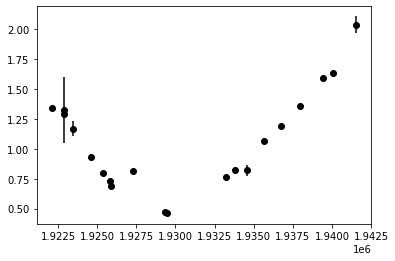

In [340]:
plt.errorbar(auxX[10:30], auxY[10:30], yerr=auxYe[10:30], color = 'black', fmt = 'o')
plt.show()

(array([1.395e+00, 1.000e-03, 1.000e-01]), array([nan, nan, nan]))

In [342]:
def fit_iso_curve_f2(f, sigma, errors = None, seeds = [1.395, 1e-4, 0.1]):#T and sT in ps
    try:
        if errors is not None:
            fit_params, fit_covariance = curve_fit(iso_curve_f2, f, sigma, p0=seeds,
                                            sigma=errors, absolute_sigma=True)
        else: 
            fit_params, fit_covariance = curve_fit(iso_curve_f2, f, sigma, p0=seeds)
        return fit_params, np.sqrt(np.diag(fit_covariance))

    except RuntimeError:
        pass

def iso_curve_f2(revf, gammat, dp_p, sys, path = 108.36):
    return np.sqrt((((1-(path/c*revf)**2-1/(gammat**2))*dp_p*revf)**2+sys**2))

In [343]:
fit_params, err = fit_iso_curve_f2(auxX[10:30], auxY[10:30],# errors= auxYe[10:30],
                                 seeds= [1.3956, 1e-4, 0.4])

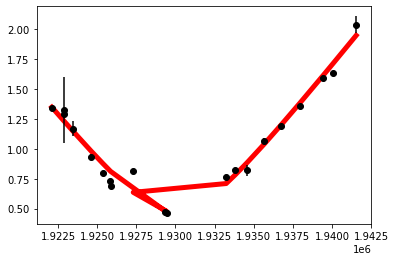

In [344]:
plt.plot(auxX[10:30], iso_curve_f2(auxX[10:30], *fit_params), 'r-',  linewidth=5)
plt.errorbar(auxX[10:30], auxY[10:30], yerr=auxYe[10:30], color = 'black', fmt = 'o')

plt.show()

In [345]:
fit_params,err

(array([1.39566887e+00, 1.66372615e-04, 4.69702571e-01]),
 array([9.23158366e-05, 4.06427362e-06, 4.22409229e-02]))

In [228]:
aaa

299792458.0

In [320]:
auxYe[10:30]

array([0.01403162, 0.02574068, 0.27647539, 0.06080296, 0.0181197 ,
       0.00667641, 0.0046588 , 0.02184813, 0.00252325, 0.00767801,
       0.        , 0.00482151, 0.0056288 , 0.0474448 , 0.02371398,
       0.00866913, 0.01064946, 0.0167301 , 0.01345437, 0.06962595])

In [335]:
iso_data[21]

array(['$^{54}$Cr$^{24+}$', '1924539.288716929', '0.0',
       '1.4014641254168072', '0.0', '217.93630247471094', '0.0'],
      dtype='<U32')